Aus Anaconda Prompt gestartet (DataScienceRetreat Environment) mit keras & tensorflow vorinstalliert

In [1]:
import keras

Using TensorFlow backend.


In [2]:
print(keras.__version__)

2.2.2


In [3]:
from keras.datasets import mnist
from keras import models, layers

In [4]:
model = models.Sequential()
model.add(layers.Dense(
    512, #outputsize of layer
    activation="relu",
    input_shape=(28*28,) #reshape to 1-dim vector
))
#dense means "fully connected"
model.add(layers.Dense(10 #outputsize of layer (representing the 10 digits 0-9)
                       , activation="softmax"))

#best practice for deep learning: use relu as often as possible and softmax for the output layer

model.summary()

model.compile(
    optimizer="rmsprop", #always a good start
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

#401920 = (28*28+1)*512

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [5]:
import matplotlib.pyplot as plt


(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print("Train:",train_images.shape)
print("Test:",test_images.shape)

plt.imshow(train_images[1], cmap="gray")
plt.title(str(train_labels[1]))
plt.show()

print(train_images[1])

train_images = train_images.reshape((60000,28*28))
train_images = train_images.astype("float32") / 255.0 #always noramlize your data
#divide by 255 to keep all numbers between 0 and 1

test_images = test_images.reshape((10000,28*28))
test_images = test_images.astype("float32") / 255.0
#divide by 255 to keep all numbers between 0 and 1

from keras.utils import to_categorical

print("Before:",train_labels[1])
train_labels = to_categorical(train_labels)
test_labes = to_categorical(test_labels)
print("After:",train_labels[1])

Train: (60000, 28, 28)
Test: (10000, 28, 28)


<Figure size 640x480 with 1 Axes>

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [6]:
model.evaluate(train_images, train_labels)

60000/60000 [==============================] - 1s 24us/step


[2.456342540105184, 0.08918333333333334]

In [7]:
import numpy as np
print(np.max(model.predict(train_images[0:1])))
print(np.argmax(model.predict(train_images[0:1])))
print(train_labels[0])

0.18799314
8
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [8]:
history = model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128
)

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2527 - acc: 0.9268
Epoch 2/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.1020 - acc: 0.9701
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0680 - acc: 0.9799
Epoch 4/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.0490 - acc: 0.9854
Epoch 5/5
60000/60000 [==============================] - 3s 42us/step - loss: 0.0376 - acc: 0.9888


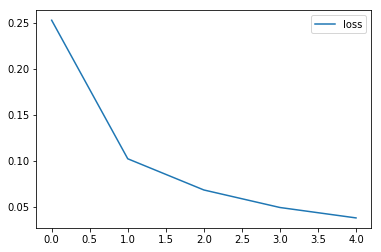

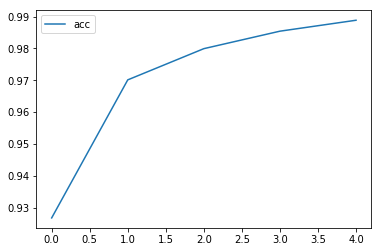

In [9]:
#print(history.history)
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.legend()
plt.show()
plt.close()

In [10]:
test_loss, test_acc = model.evaluate(train_images, train_labels)
print(test_loss, test_acc)

60000/60000 [==============================] - 1s 24us/step
0.028255934832803906 0.9917166666666667
